In [1]:
# 1ª - 
# a)
#   Nome: Autism-Child-Data.arff
#   Descrição: Children screening data for autism suitable for classification and predictive tasks
#   Volume de dados: 292
# b)
#   Principais colunas: 
#      austim: Determinação final se o jovem está ou não dentro do ASD (Autistic Spectrum Disorder)
#      Class/ASD: Avalia se o aluno está ou não dentro do espectro ASD.
#      Result: Somatório dos resultados das perguntas relacionadas a detecção do TEA. 
# c)
#   Objetivo do dataset: 
#      Identificar a presença do autismo em jovens por base em perguntas e características
#      clinicamente validadas para esse fim. 

In [1]:
from scipy.io import arff
import numpy
import pandas as pd
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

import matplotlib.pyplot as plt

data = arff.loadarff('Autism-Child-Data.arff')
df = pd.DataFrame(data[0])
dfb = df.copy()
dfb.drop(dfb.columns[[10, 17]], axis=1, inplace=True)
dfb.head(2)
for column in dfb.columns:
    dfb[column] = dfb[column].str.decode('utf-8') 

df.update(dfb)
df.head(3)

ModuleNotFoundError: No module named 'scipy'

In [27]:
# 2ª Questão
# a) Tipo das colunas
df.dtypes
# b) Campos nulos
for field in df.columns:
    print('Coluna:', field,'|Qtd nulos:', df[field].isnull().sum())
# c) Variáveis categóricas
# d) Campos novos criados com justificativa
df['born_case'] = df['Class/ASD']
for i in range(len(df['Class/ASD'])):
    df['born_case'][i] = 'yes' if (df['jundice'][i].lower() == 'yes'\
                                   and df['Class/ASD'][i].lower() == 'yes') else 'no'
# Novo campo: born_case.
# Razão: análise de caso de nascimento com icteria do jovem e se algum parente dele foi anteriormente
# Diagnósticado com desordem de desenvolvimento pervasivo, o que pode aumentar as chances do jovem ser propenso
# a o TEA.
y = df['austim']
x = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',\
        'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'contry_of_res', \
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD', 'born_case']]
# e) Campos descartados com justificativa
# Campos retirados: 
#      Scores. Razão: Importância final deles para este cenário se baseia no result.
#      age_desc. Razão: Todos os dados coletados são de jovens na faixa de 4 a 11 anos,
#      sendo a única existente na coluna do dataset.
x.drop(x.columns[0:10], axis=1, inplace=True)
x.drop(x.columns[7], axis=1, inplace=True)

media = x['age'][x['age'] > 0].mean()
x.loc[x['age'].isnull(), 'age'] = media

x = pd.get_dummies(x)

y.isnull().sum()

Coluna: A1_Score |Qtd nulos: 0
Coluna: A2_Score |Qtd nulos: 0
Coluna: A3_Score |Qtd nulos: 0
Coluna: A4_Score |Qtd nulos: 0
Coluna: A5_Score |Qtd nulos: 0
Coluna: A6_Score |Qtd nulos: 0
Coluna: A7_Score |Qtd nulos: 0
Coluna: A8_Score |Qtd nulos: 0
Coluna: A9_Score |Qtd nulos: 0
Coluna: A10_Score |Qtd nulos: 0
Coluna: age |Qtd nulos: 4
Coluna: gender |Qtd nulos: 0
Coluna: ethnicity |Qtd nulos: 0
Coluna: jundice |Qtd nulos: 0
Coluna: austim |Qtd nulos: 0
Coluna: contry_of_res |Qtd nulos: 0
Coluna: used_app_before |Qtd nulos: 0
Coluna: result |Qtd nulos: 0
Coluna: age_desc |Qtd nulos: 0
Coluna: relation |Qtd nulos: 0
Coluna: Class/ASD |Qtd nulos: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0

In [31]:
# f) Conversões entre tipos de colunas
cont = 1
for column in df.columns:
    df[column] = pd.to_numeric(df[column])
    cont += 1
    if (cont == 10):
        break
print(df.dtypes)
# g) Técnica de análise não apresentada em sala
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)
clf = RandomForestClassifier(max_depth=2,random_state=0)
clf.fit(x_teste, y_teste)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\
            max_depth=2, max_features='auto', max_leaf_nodes=None,\
            min_impurity_decrease=0.0, min_impurity_split=None,\
            min_samples_leaf=1, min_samples_split=2,\
            min_weight_fraction_leaf=0.0, n_jobs=None,\
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.score)
# pd.value_counts(df['age'])

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
born_case           object
dtype: object
<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
# h) Analise, com APIs específicas, pelo menos 3 características relevantes do
#    dataset e exiba gráficos a respeito
df['age'].hist()
plt.show()
df_age = df['age'].dropna()
plt.boxplot(df_age, showfliers= True)

<Figure size 640x480 with 1 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f632ec928d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f632ec92f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f632ec92780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f632ec1c630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f632ec1c978>],
 'means': []}

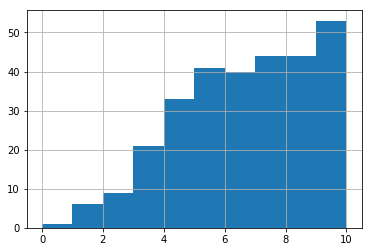

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85cb1a5c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85cb7e32e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85cb1a5ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85cb7e3978>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85cb7e3cc0>],
 'means': []}

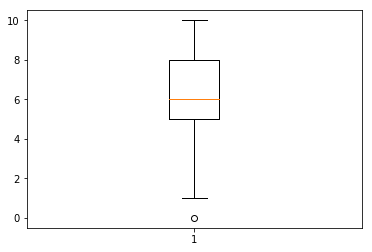

In [49]:
df['result'].hist()
plt.show()

df_result = df['result'].dropna()
plt.boxplot(df_result, showfliers= True)

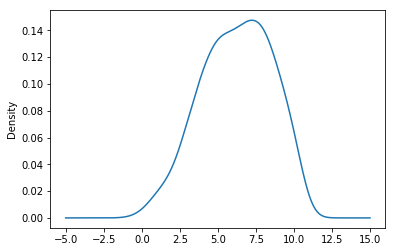

In [48]:
data = df['result']
data.plot(kind='density', subplots=True, layout=(1,1), sharex=False)
plt.show()

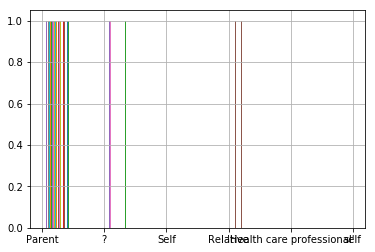

In [33]:
df['relation'].hist()
plt.show()
# df_relation = df['relation'].dropna()
# plt.boxplot(df_relation, showfliers= True)

In [32]:
# 4ª) - 
# a. Crie gráficos para comparar a performance dos algoritmos;

# b. Exiba a matriz de confusão dos resultados;
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

modelot = tree.DecisionTreeClassifier(criterion='gini')
modelot.fit(x_treino, y_treino)
modelot.score(x_treino, y_treino)

modelog = GaussianNB()
modelog.fit(x_treino, y_treino)
modelog.score(x_teste, y_teste)

modelom = MultinomialNB()
modelom.fit(x_treino, y_treino)
modelom.score(x_teste, y_teste)

modelob = BernoulliNB()
modelob.fit(x_treino, y_treino)
modelob.score(x_teste, y_teste)

# confusion_matrix(y_teste, model.predict(x_teste))
print(pd.crosstab(y_teste, modelot.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))
print("\n")
print(pd.crosstab(y_teste, modelog.predict(x_teste), rownames=['Real'], colnames=['Predito G'], margins=True))
print("\n")
print(pd.crosstab(y_teste, modelom.predict(x_teste), rownames=['Real'], colnames=['Predito M'], margins=True))
print("\n")
print(pd.crosstab(y_teste, modelob.predict(x_teste), rownames=['Real'], colnames=['Predito B'], margins=True))


# c. Avalie as métricas de acurácia, precisão e recall;
# d. Analise pelo menos mais duas métricas;
# e. Justifique os resultados.


Predito T  no  yes  All
Real                   
no         54    7   61
yes         7    5   12
All        61   12   73


Predito G  no  yes  All
Real                   
no         17   44   61
yes         4    8   12
All        21   52   73


Predito M  no  yes  All
Real                   
no         60    1   61
yes        11    1   12
All        71    2   73


Predito B  no  yes  All
Real                   
no         58    3   61
yes        11    1   12
All        69    4   73


10


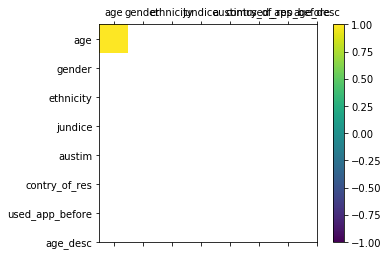

In [9]:
def tratar_colunas(df):
    if (len(df.columns) >= 21):
        df.drop(df.columns[0:10], axis=1, inplace=True)
        df.drop(df.columns[7], axis=1, inplace=True)
    return df

b = tratar_colunas(df)
names = [column for column in df.columns]

print(len(b.columns))
correlations = b.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

                                            age    result  gender_f  gender_m  \
age                                    1.000000  0.081402  0.052422 -0.052422   
result                                 0.081402  1.000000 -0.043572  0.043572   
gender_f                               0.052422 -0.043572  1.000000 -1.000000   
gender_m                              -0.052422  0.043572 -1.000000  1.000000   
ethnicity_'Middle Eastern '            0.059444 -0.214950  0.084430 -0.084430   
ethnicity_'South Asian'               -0.155091 -0.011822 -0.059770  0.059770   
ethnicity_?                           -0.074865 -0.111465 -0.050594  0.050594   
ethnicity_Asian                       -0.049272 -0.000113 -0.087902  0.087902   
ethnicity_Black                       -0.061232  0.053716 -0.000970  0.000970   
ethnicity_Hispanic                     0.033613  0.032606 -0.000678  0.000678   
ethnicity_Latino                      -0.052185  0.074337 -0.013967  0.013967   
ethnicity_Others            

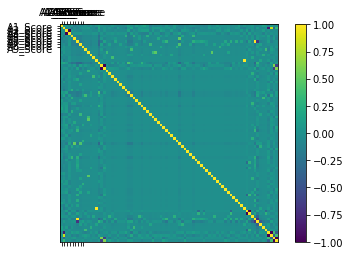

In [29]:
correlations = x.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [1]:
# from arff2pandas import a2p
# with open('Autism-Child-Data.arff') as f:
#     df = a2p.load(f)
# df.head(3)
# filtered_df = df[(df['austim@{no,yes}'] == 'yes') & (df['result@NUMERIC'] >= 5)].filter(like='austim').count()
# filtered_df